In [17]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read the data
df_3 = pd.read_csv("/content/ETTm1.csv")

# print the first five columns
df_3.head()

# print the data dimension
df_3.shape

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


(69680, 8)

In [3]:
# print some info about the data
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    69680 non-null  object 
 1   HUFL    69680 non-null  float64
 2   HULL    69680 non-null  float64
 3   MUFL    69680 non-null  float64
 4   MULL    69680 non-null  float64
 5   LUFL    69680 non-null  float64
 6   LULL    69680 non-null  float64
 7   OT      69680 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [4]:
# print som statistical information about the data
df_3.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000
mean,7.413993,2.261418,4.322226,0.896509,3.082888,0.857907,13.320642
std,7.082928,2.041293,6.829189,1.807239,1.174063,0.600440,8.564817
min,-23.242001,-5.693000,-26.367001,-6.041000,-1.188000,-1.371000,-4.221000
25%,5.827000,0.804000,3.305000,-0.284000,2.315000,0.670000,6.964000
50%,8.841000,2.210000,6.005000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.655000,1.218000,18.079000
max,24.180000,10.315000,18.087000,7.853000,8.498000,3.046000,46.007000


In [5]:
# set date column as an index
df_3["date"] = pd.to_datetime(df_3["date"])
df_3.set_index("date", inplace= True)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'Oil Temperature')

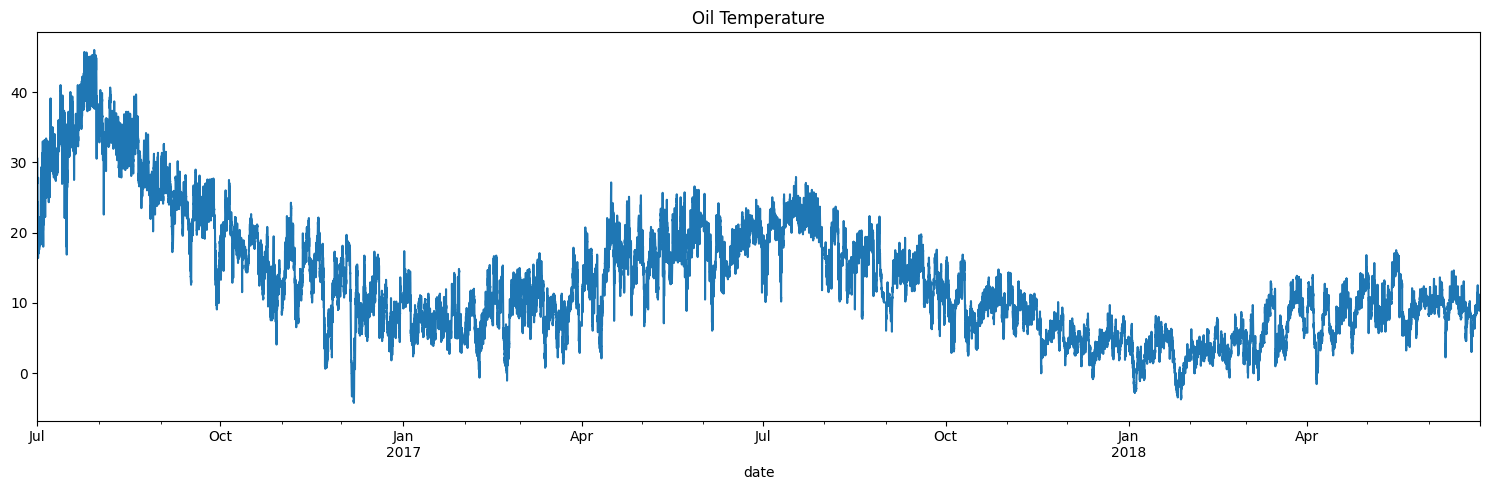

In [6]:
# display oil temperature through the time
plt.figure(figsize=(15, 5))
df_3['OT'].plot()
plt.title("Oil Temperature")
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HUFL')

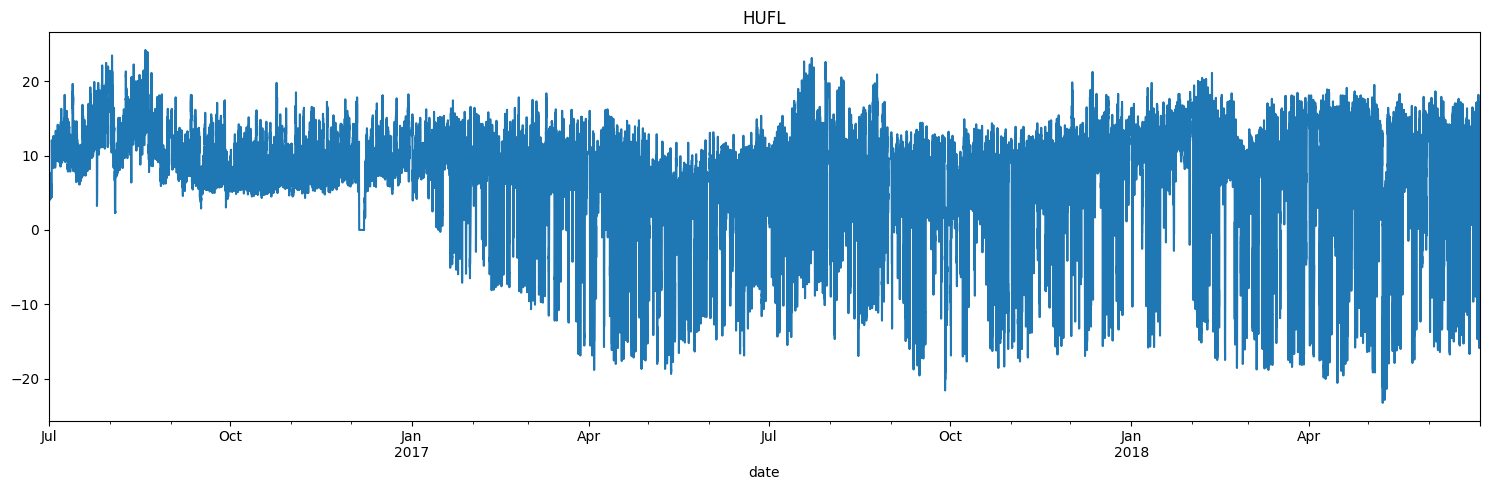

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HULL')

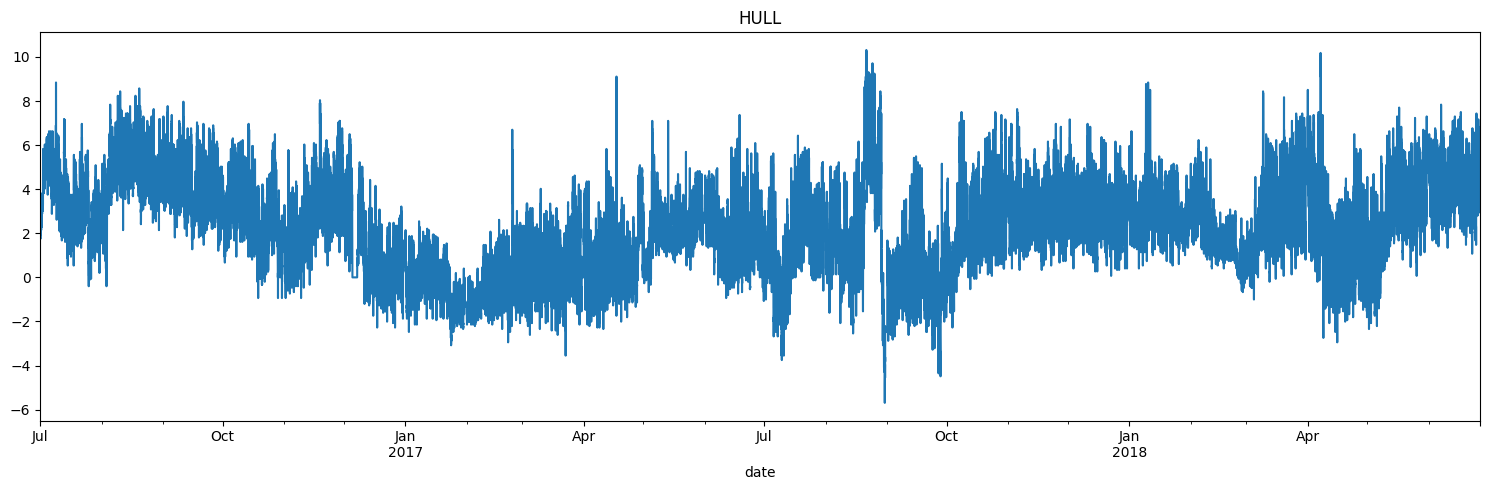

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MUFL')

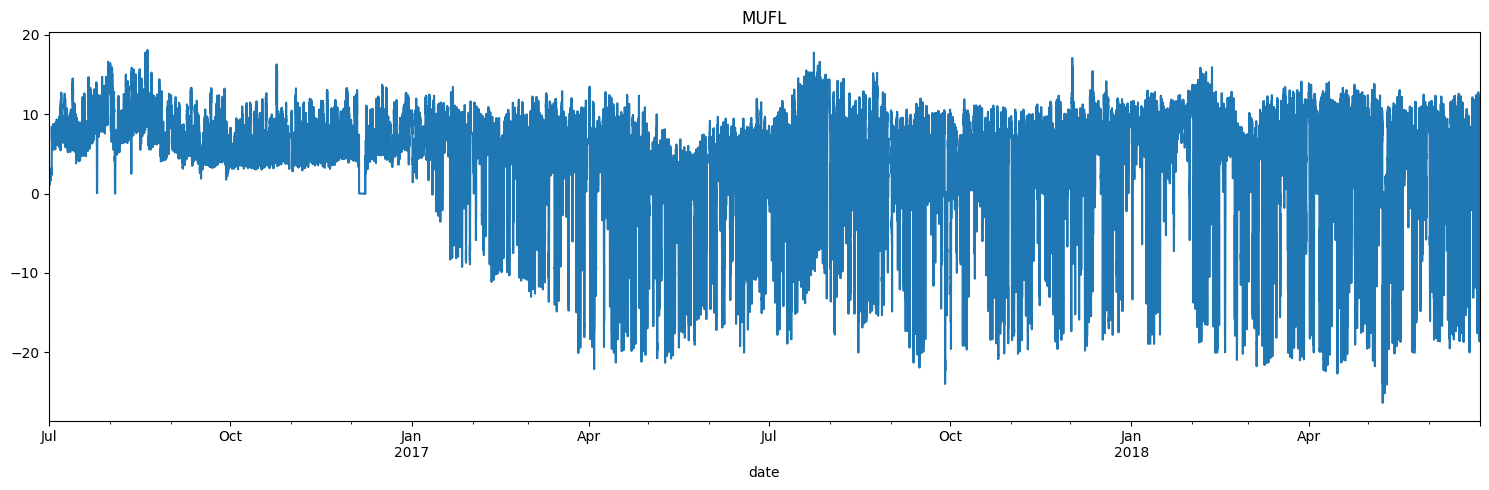

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MULL')

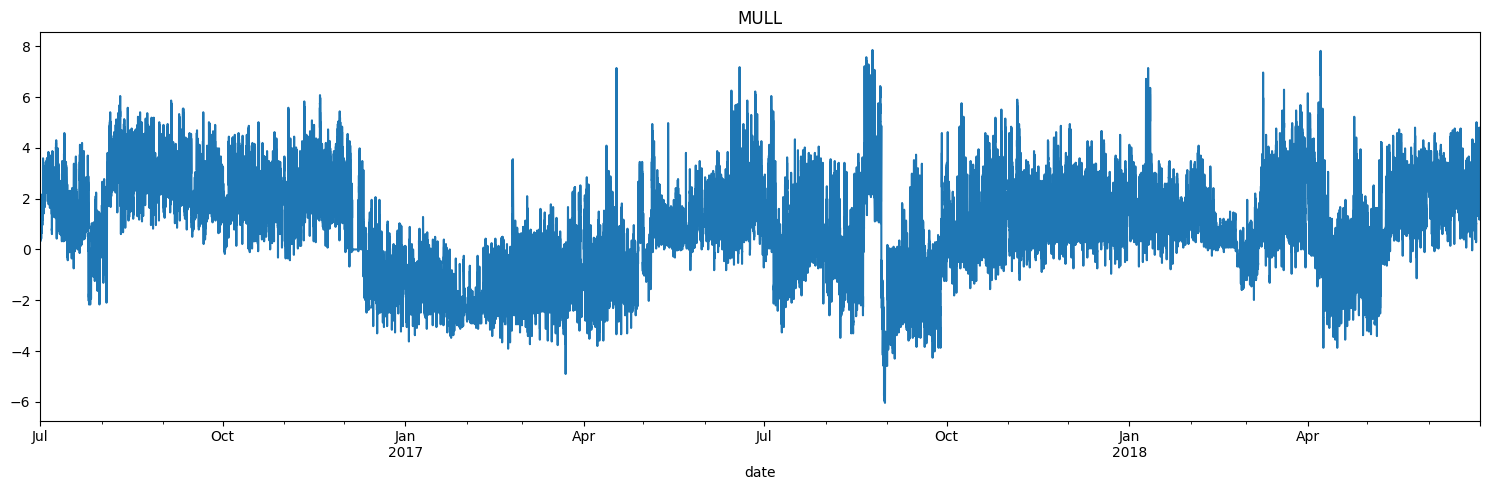

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LUFL')

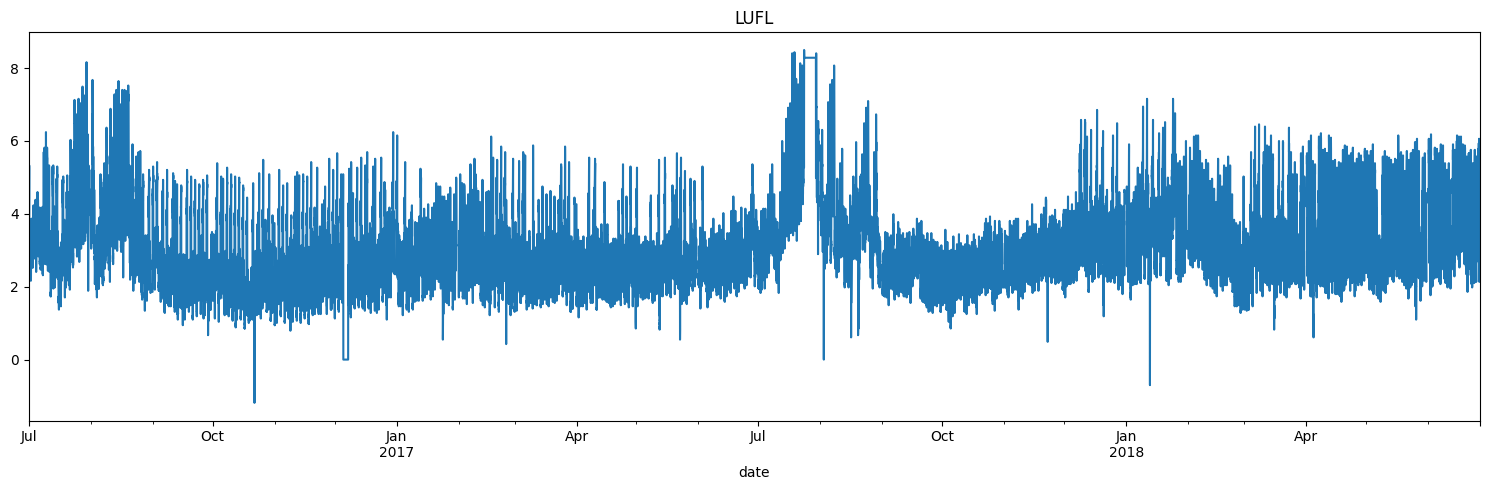

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LULL')

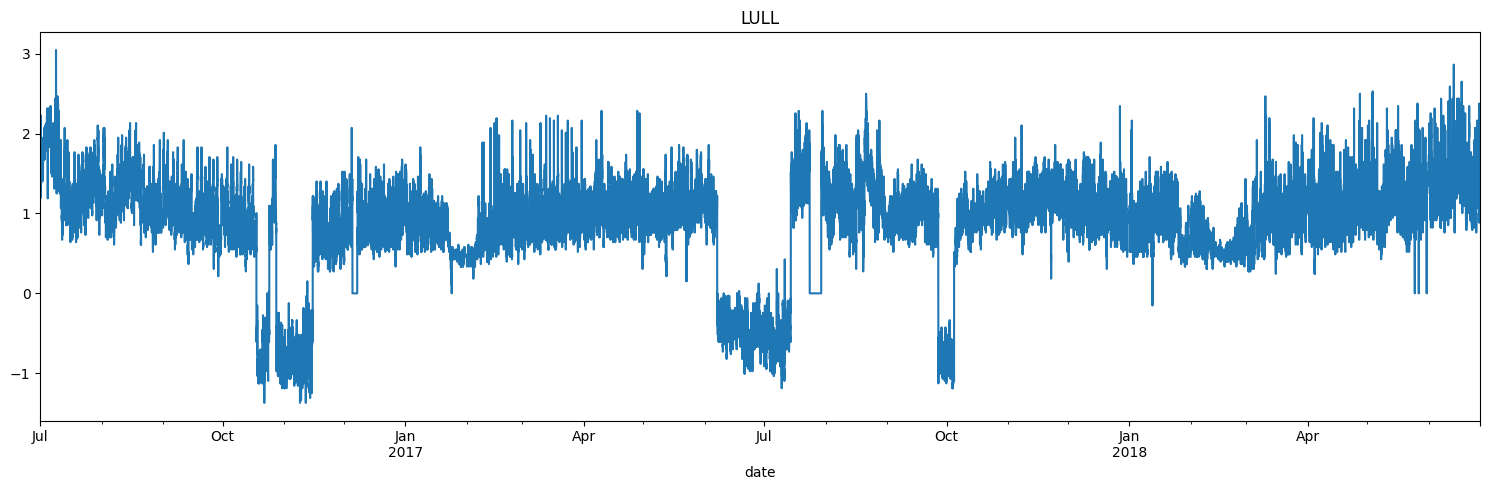

In [7]:
# display the other features through the time

columns = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']

for col in columns:
    plt.figure(figsize=(15, 5))
    df_3[col].plot()
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [8]:
# choose all features because of multi-variant

n_cols = 7
cols = list(df_3.loc[:,:])
dataset = df_3[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(69680, 7)

In [9]:
# perform minmaxscaler on the data
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# split the data and specify the training data
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train_data = scaled_data[0:train_size, :]

train_data.shape

(55744, 7)

In [11]:
# Creating a Training set with 336 time-steps
x_train = []
y_train = []
time_steps = 336
n_cols = 7

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [12]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

x_train.shape , y_train.shape

((69344, 336, 7), (69344, 7))

In [13]:
# bulid the model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_cols)
])

# compile the model
model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mse")

# train the model
history = model.fit(x_train, y_train, epochs= 100,validation_split=.2, batch_size= 32)

Epoch 1/100
1734/1734 [==============================] - 92s 47ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/100
1734/1734 [==============================] - 79s 45ms/step - loss: 9.9933e-04 - mse: 9.9933e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/100
1734/1734 [==============================] - 80s 46ms/step - loss: 8.9367e-04 - mse: 8.9367e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/100
1734/1734 [==============================] - 79s 45ms/step - loss: 8.6046e-04 - mse: 8.6046e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 5/100
1734/1734 [==============================] - 79s 45ms/step - loss: 8.3952e-04 - mse: 8.3952e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/100
1734/1734 [==============================] - 79s 45ms/step - loss: 8.2147e-04 - mse: 8.2147e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/100
1734/1734 [==============================] - 79s 45ms/step - loss: 8.0371e-04 - mse: 8.0371e-04 - val_loss: 0.0012 - val_mse: 

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Losses')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

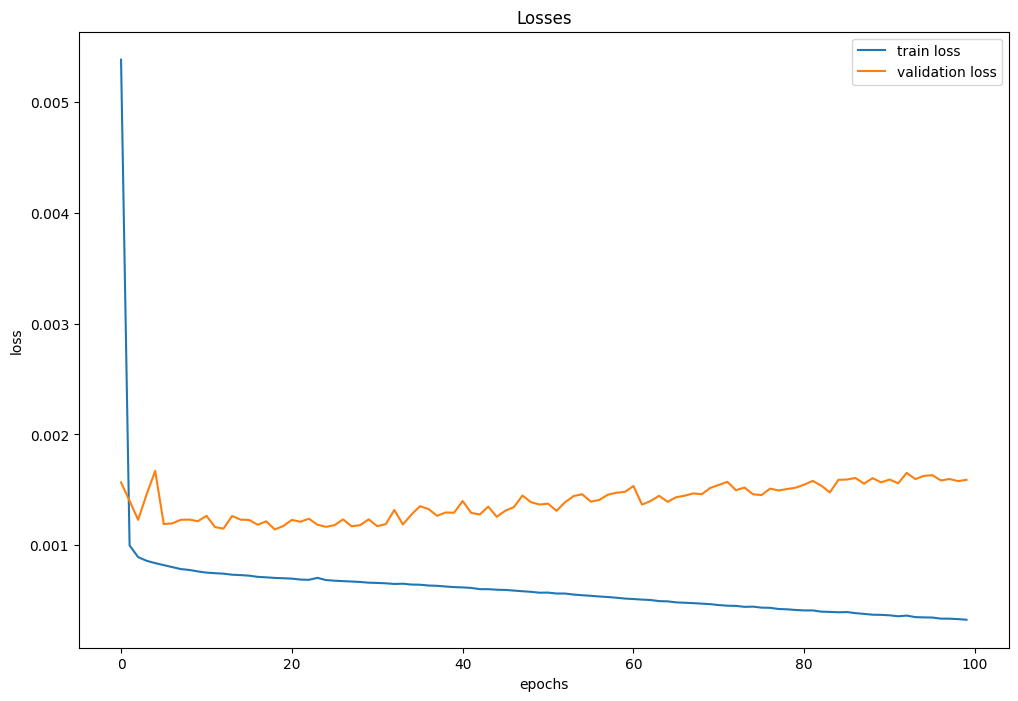

In [14]:
# plot the loss function for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss','validation loss'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# prediction_length_336

In [42]:
# Creating a testing set with 336 time-steps
time_steps = 336
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [43]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

436/436 [==============================] - 7s 16ms/step


(13936, 7)

Mean Squared Error (MSE): 0.0015846850493566715
Mean Absolute Error (MAE): 0.024474968308764822


In [44]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [45]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [46]:
# put predictions and actuals in a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,2.603367,3.684
1,2.161468,2.210
2,-1.083082,-0.711
3,0.990625,1.350
4,3.922713,4.112
...,...,...
97547,7.761304,8.244
97548,1.832539,1.777
97549,4.281057,4.721
97550,1.465605,1.523


<Figure size 1600x600 with 0 Axes>

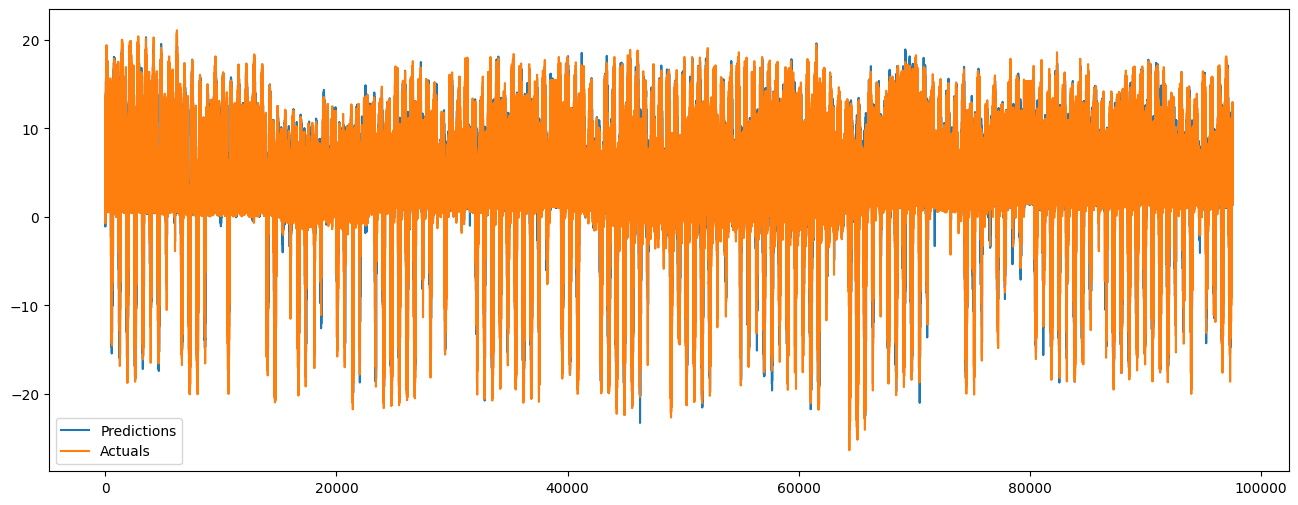

In [47]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_96

In [22]:
# Creating a testing set with 96 time-steps
time_steps = 96
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [24]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

436/436 [==============================] - 3s 7ms/step


(13936, 7)

Mean Squared Error (MSE): 0.0015839715679859454
Mean Absolute Error (MAE): 0.02445212383239057


In [25]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [26]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [27]:
# put predictions and actuals on a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,2.484600,3.684
1,2.202052,2.210
2,-1.221535,-0.711
3,1.040345,1.350
4,3.935133,4.112
...,...,...
97547,7.782466,8.244
97548,1.833839,1.777
97549,4.293075,4.721
97550,1.461265,1.523


<Figure size 1600x600 with 0 Axes>

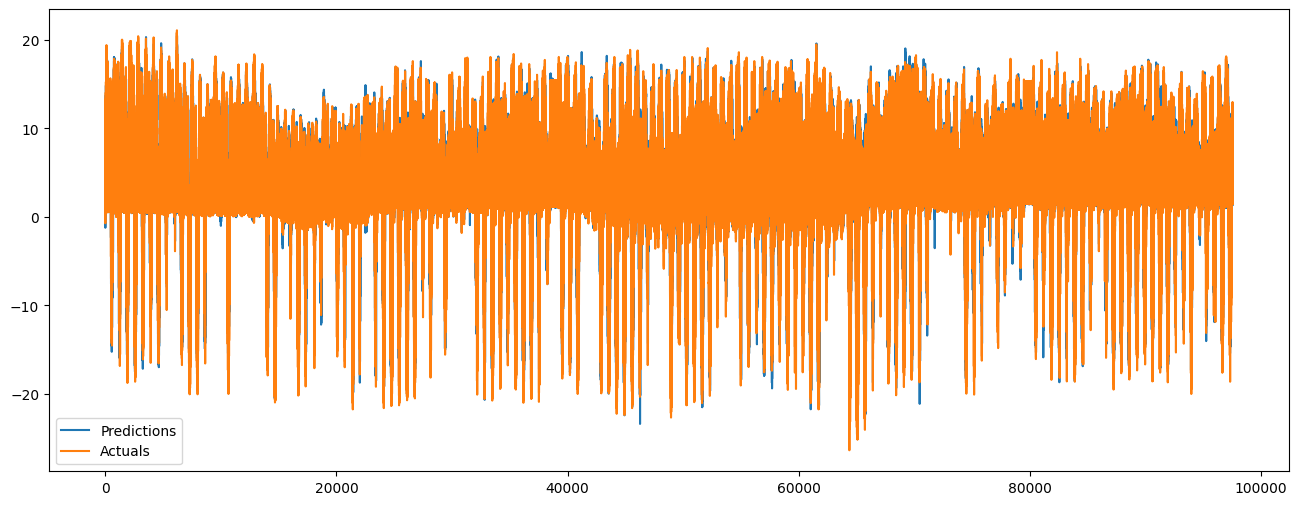

In [28]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_192

In [29]:
# Creating a testing set with 192 time-steps
time_steps = 192
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [31]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

436/436 [==============================] - 5s 11ms/step


(13936, 7)

Mean Squared Error (MSE): 0.0015846877484543625
Mean Absolute Error (MAE): 0.0244752563818537


In [32]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [33]:
# nverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [34]:
# put predictions and actuals at one dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,2.608110,3.684
1,2.189487,2.210
2,-1.078275,-0.711
3,1.016622,1.350
4,3.923568,4.112
...,...,...
97547,7.759221,8.244
97548,1.832327,1.777
97549,4.279854,4.721
97550,1.466428,1.523


<Figure size 1600x600 with 0 Axes>

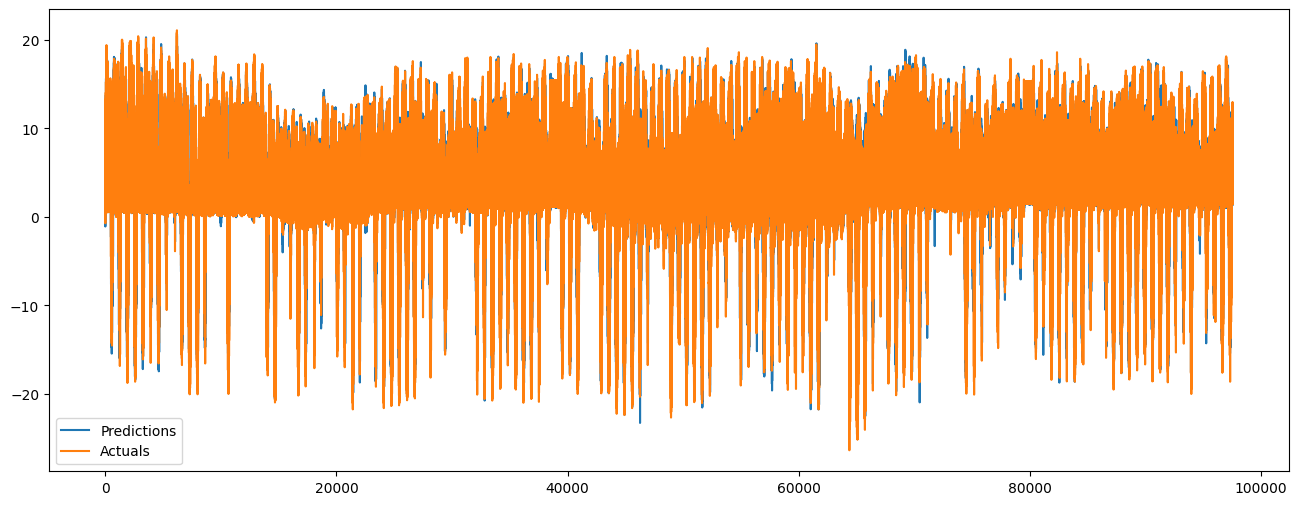

In [35]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

#prediction_length_720

In [36]:
# Creating a testing set with 720 time-steps
time_steps = 720
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [37]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

436/436 [==============================] - 15s 33ms/step


(13936, 7)

Mean Squared Error (MSE): 0.001584679769556603
Mean Absolute Error (MAE): 0.02447503688341093


In [38]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [39]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [40]:
# put predictions and actuals at single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,2.603661,3.684
1,2.161330,2.210
2,-1.082828,-0.711
3,0.990486,1.350
4,3.922744,4.112
...,...,...
97547,7.761256,8.244
97548,1.832534,1.777
97549,4.281031,4.721
97550,1.465631,1.523


<Figure size 1600x600 with 0 Axes>

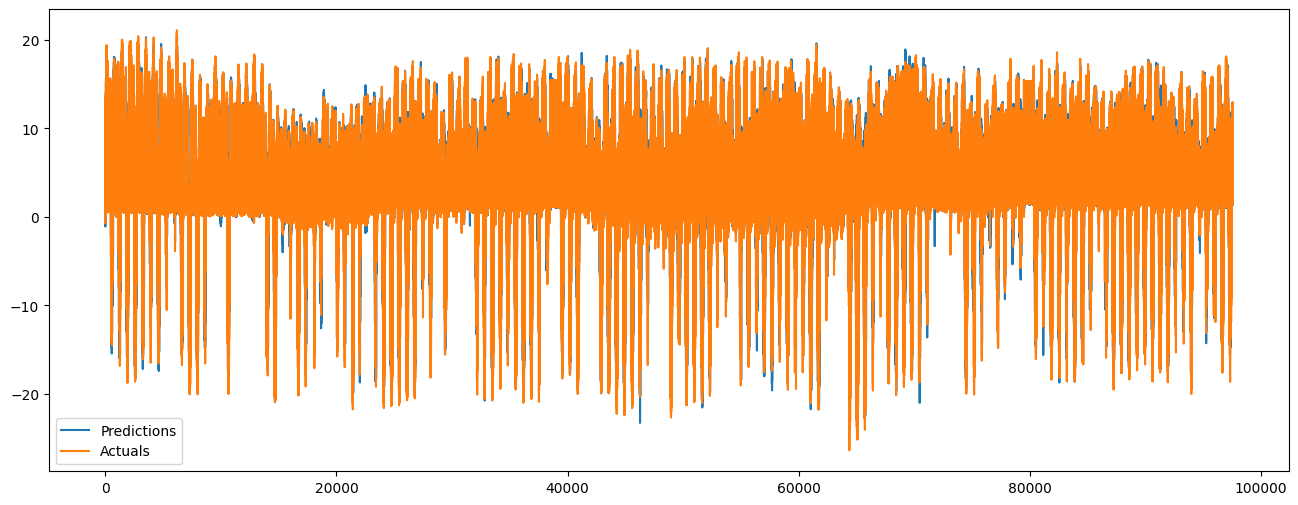

In [41]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()